In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats.mstats import winsorize

In [2]:
def box_plot(name):
    # Create subplots to display multiple box plots side by side
    plt.figure(figsize=(8, 4))

    # Box plot for 'price' column
    sns.boxplot(x=train[name], color='#FFA570')
    plt.xlabel(name)
    plt.title(f'Box Plot of {name}')

In [3]:
train = pd.read_csv('Train-Set.csv')
train

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,21243,38468,35,management,married,tertiary,no,750.0,yes,no,cellular,18,aug,233,12,-1,0,unknown,no
54708,45891,4378,31,services,married,high.school,no,NaN,no,no,telephone,may,wed,636,6,999,0,nonexistent,no
54709,42613,65128,35,management,married,tertiary,no,323.0,no,no,cellular,11,jan,261,2,-1,0,unknown,yes
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,27,apr,149,2,182,1,failure,no


In [ ]:
Train-Set.csv / Test-Set.csv

In [4]:
test = pd.read_csv('Test-Set.csv')
test

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45247,74249,34,admin.,married,university.degree,no,NaN,no,no,cellular,jul,wed,266,1,999,0,nonexistent
1,19894,35779,31,management,single,tertiary,no,165.0,no,yes,cellular,8,aug,523,2,-1,0,unknown
2,70048,66769,28,blue-collar,single,basic.9y,no,NaN,no,no,telephone,may,fri,489,2,999,0,nonexistent
3,24241,27888,57,admin.,divorced,secondary,no,1878.0,yes,no,cellular,17,nov,219,1,-1,0,unknown
4,20495,63306,55,management,divorced,tertiary,no,277.0,no,no,cellular,12,aug,101,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,62765,902,36,blue-collar,married,basic.6y,no,NaN,no,no,telephone,may,fri,203,5,999,0,nonexistent
23445,28615,39745,44,services,married,secondary,no,133.0,no,no,cellular,29,jan,202,3,-1,0,unknown
23446,55510,40150,31,blue-collar,married,basic.9y,no,NaN,yes,no,cellular,jul,wed,590,1,999,0,nonexistent
23447,53035,6012,43,management,divorced,high.school,no,NaN,yes,no,cellular,nov,mon,488,2,999,0,nonexistent


In [5]:
submission=pd.read_csv('Sample_Submition.csv')

In [6]:
submission=pd.DataFrame()
submission['id']=test['id']

In [7]:
submission['id']

0        74249
1        35779
2        66769
3        27888
4        63306
         ...  
23444      902
23445    39745
23446    40150
23447     6012
23448    61584
Name: id, Length: 23449, dtype: int64

In [8]:
for index, row in train.iterrows():
    if row['day'] in train['month'].values:
        train.at[index, 'month'] = row['day']

In [9]:
for index, row in test.iterrows():
    if row['day'] in test['month'].values:
        test.at[index, 'month'] = row['day']

In [10]:
train.drop(columns=['day'],inplace=True)
train

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,904,3,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,21243,38468,35,management,married,tertiary,no,750.0,yes,no,cellular,aug,233,12,-1,0,unknown,no
54708,45891,4378,31,services,married,high.school,no,NaN,no,no,telephone,may,636,6,999,0,nonexistent,no
54709,42613,65128,35,management,married,tertiary,no,323.0,no,no,cellular,jan,261,2,-1,0,unknown,yes
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,apr,149,2,182,1,failure,no


In [11]:
test.drop(columns=['day'],inplace=True)
test

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,45247,74249,34,admin.,married,university.degree,no,NaN,no,no,cellular,jul,266,1,999,0,nonexistent
1,19894,35779,31,management,single,tertiary,no,165.0,no,yes,cellular,aug,523,2,-1,0,unknown
2,70048,66769,28,blue-collar,single,basic.9y,no,NaN,no,no,telephone,may,489,2,999,0,nonexistent
3,24241,27888,57,admin.,divorced,secondary,no,1878.0,yes,no,cellular,nov,219,1,-1,0,unknown
4,20495,63306,55,management,divorced,tertiary,no,277.0,no,no,cellular,aug,101,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,62765,902,36,blue-collar,married,basic.6y,no,NaN,no,no,telephone,may,203,5,999,0,nonexistent
23445,28615,39745,44,services,married,secondary,no,133.0,no,no,cellular,jan,202,3,-1,0,unknown
23446,55510,40150,31,blue-collar,married,basic.9y,no,NaN,yes,no,cellular,jul,590,1,999,0,nonexistent
23447,53035,6012,43,management,divorced,high.school,no,NaN,yes,no,cellular,nov,488,2,999,0,nonexistent


In [12]:
train = train.drop(['Unnamed: 0','id'], axis=1)
test = test.drop(['Unnamed: 0','id'], axis=1)

age  and duration


In [13]:
train['age'] = winsorize(train['age'], limits=[0.05, 0.05])

In [14]:
test['age'] = winsorize(test['age'], limits=[0.05, 0.05])

In [15]:
train['duration'] = winsorize(train['duration'], limits=[0.05, 0.05])

In [16]:
test['duration'] = winsorize(test['duration'], limits=[0.05, 0.05])

C:\Users\emana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

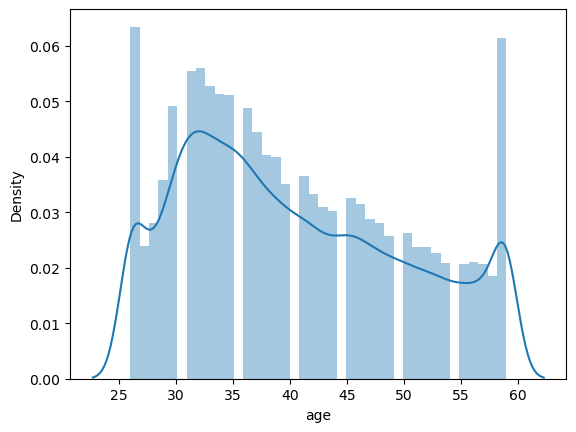

In [17]:
sns.distplot(train['age'], kde=True)


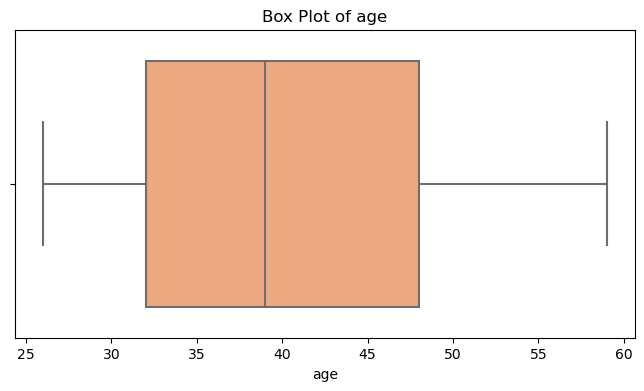

In [18]:
box_plot('age')

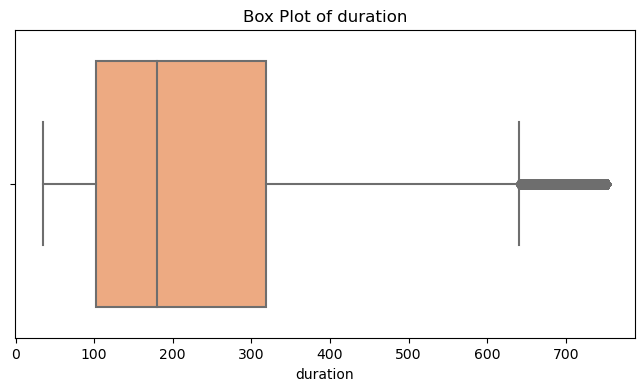

In [19]:
box_plot('duration')

In [20]:
le = LabelEncoder()

train[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
    'Target']]=train[['job',
                   'marital',
                   'education',
                   'default',
                   'housing',
                   'loan',
                   'contact',
                   'month',
                   'poutcome',
                   'Target']].apply(le.fit_transform)

In [21]:
test[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome']]=test[['job',
                   'marital',
                   'education',
                   'default',
                   'housing',
                   'loan',
                   'contact',
                   'month',
                   'poutcome']].apply(le.fit_transform)

In [22]:
train

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,47,1,1,2,0,NaN,0,2,0,0,583,2,999,1,0,0
1,48,4,0,8,0,351.0,2,0,0,0,725,3,-1,0,4,0
2,38,9,2,3,0,NaN,0,0,0,1,74,2,999,0,1,0
3,50,4,0,8,0,1270.0,2,0,0,8,35,3,-1,0,4,0
4,54,6,1,3,0,NaN,2,2,0,1,752,3,999,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,4,1,8,0,750.0,2,0,0,1,233,12,-1,0,4,0
54708,31,7,1,3,0,NaN,0,0,1,8,636,6,999,0,1,0
54709,35,4,1,8,0,323.0,0,0,0,4,261,2,-1,0,4,1
54710,59,5,1,7,0,616.0,0,0,0,0,149,2,182,1,0,0


In [23]:
test

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,34,0,1,9,0,NaN,0,0,0,5,266,1,999,0,1
1,31,4,2,8,0,165.0,0,2,0,1,523,2,-1,0,4
2,28,1,2,2,0,NaN,0,0,1,8,489,2,999,0,1
3,57,0,0,7,0,1878.0,2,0,0,9,219,1,-1,0,4
4,55,4,0,8,0,277.0,0,0,0,1,101,3,-1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,36,1,1,1,0,NaN,0,0,1,8,203,5,999,0,1
23445,44,7,1,7,0,133.0,0,0,0,4,202,3,-1,0,4
23446,31,1,1,2,0,NaN,2,0,0,5,590,1,999,0,1
23447,43,4,0,3,0,NaN,2,0,0,9,488,2,999,0,1


In [24]:
# Separate data into two sets: with missing 'balance' values and without missing 'balance' values
train_missing_balance = train[train['balance'].isnull()]
train_not_missing_balance = train[~train['balance'].isnull()]

In [25]:
# Features for training the model
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
             'month', 'duration', 'campaign', 'previous', 'poutcome']


In [26]:
# Split data into features and target
X_train = train_not_missing_balance[features]
y_train = train_not_missing_balance['balance']
X_pred = train_missing_balance[features]


In [27]:
# Initialize a Random Forest regressor
rf_regressor = RandomForestRegressor()

In [28]:
# Train the regressor on data with non-missing 'balance' values
rf_regressor.fit(X_train, y_train)


RandomForestRegressor()

In [29]:
# Predict missing 'balance' values
predicted_balances = rf_regressor.predict(X_pred)


In [30]:
# Fill the missing 'balance' values with the predicted values
train.loc[train['balance'].isnull(), 'balance'] = predicted_balances


In [31]:
# Verify that missing values have been filled
print(train.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [32]:
test_missing_balance =test[test['balance'].isnull()]
test_not_missing_balance = test[~test['balance'].isnull()]


In [33]:
# Split data into features and target
X_test = test_not_missing_balance[features]
y_test = test_not_missing_balance['balance']
X_pred_t = test_missing_balance[features]

In [34]:
# Train the regressor on data with non-missing 'balance' values
rf_regressor.fit(X_test, y_test)


RandomForestRegressor()

In [35]:
# Predict missing 'balance' values
predicted_balances = rf_regressor.predict(X_pred_t)


In [36]:
# Fill the missing 'balance' values with the predicted values
test.loc[test['balance'].isnull(), 'balance'] = predicted_balances


In [37]:
print(train.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [38]:
train

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,47,1,1,2,0,1339.05,0,2,0,0,583,2,999,1,0,0
1,48,4,0,8,0,351.00,2,0,0,0,725,3,-1,0,4,0
2,38,9,2,3,0,3523.26,0,0,0,1,74,2,999,0,1,0
3,50,4,0,8,0,1270.00,2,0,0,8,35,3,-1,0,4,0
4,54,6,1,3,0,1333.39,2,2,0,1,752,3,999,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,4,1,8,0,750.00,2,0,0,1,233,12,-1,0,4,0
54708,31,7,1,3,0,1772.12,0,0,1,8,636,6,999,0,1,0
54709,35,4,1,8,0,323.00,0,0,0,4,261,2,-1,0,4,1
54710,59,5,1,7,0,616.00,0,0,0,0,149,2,182,1,0,0


In [39]:
train = train.drop('pdays', axis=1)
test = test.drop('pdays', axis=1)

In [40]:
train

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,Target
0,47,1,1,2,0,1339.05,0,2,0,0,583,2,1,0,0
1,48,4,0,8,0,351.00,2,0,0,0,725,3,0,4,0
2,38,9,2,3,0,3523.26,0,0,0,1,74,2,0,1,0
3,50,4,0,8,0,1270.00,2,0,0,8,35,3,0,4,0
4,54,6,1,3,0,1333.39,2,2,0,1,752,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,4,1,8,0,750.00,2,0,0,1,233,12,0,4,0
54708,31,7,1,3,0,1772.12,0,0,1,8,636,6,0,1,0
54709,35,4,1,8,0,323.00,0,0,0,4,261,2,0,4,1
54710,59,5,1,7,0,616.00,0,0,0,0,149,2,1,0,0


In [41]:
test

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,34,0,1,9,0,740.16,0,0,0,5,266,1,0,1
1,31,4,2,8,0,165.00,0,2,0,1,523,2,0,4
2,28,1,2,2,0,1314.27,0,0,1,8,489,2,0,1
3,57,0,0,7,0,1878.00,2,0,0,9,219,1,0,4
4,55,4,0,8,0,277.00,0,0,0,1,101,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,36,1,1,1,0,1653.78,0,0,1,8,203,5,0,1
23445,44,7,1,7,0,133.00,0,0,0,4,202,3,0,4
23446,31,1,1,2,0,1217.44,2,0,0,5,590,1,0,1
23447,43,4,0,3,0,4756.60,2,0,0,9,488,2,0,1


In [42]:
# feature variables
x= train.iloc[:, :-1]

# target variable
y= train.iloc[:, -1]

<AxesSubplot:>

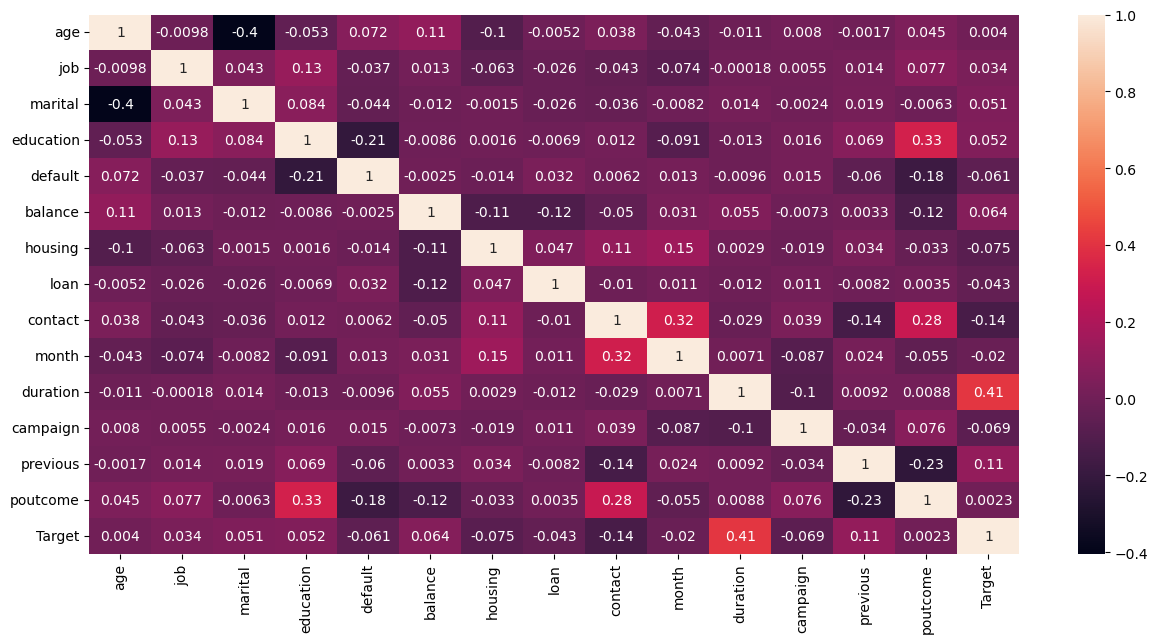

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), annot=True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size= 0.3, random_state= 42)

In [46]:
from imblearn.over_sampling import SMOTE


# Initialize SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform oversampling using SMOTE
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [47]:
x_smote

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,39,7,1,8,0,1493.000000,0,0,0,3,752,3,0,4
1,42,4,1,7,0,0.000000,0,0,2,8,234,4,0,4
2,34,1,1,5,0,336.000000,2,0,2,8,713,4,0,4
3,44,0,2,7,0,733.000000,2,0,0,2,360,2,5,3
4,42,1,1,5,0,187.000000,2,0,2,6,43,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67829,30,0,2,7,0,223.439006,1,0,1,5,751,10,0,3
67830,54,9,1,7,0,1626.003631,0,0,0,3,284,1,0,4
67831,31,8,2,4,0,913.985831,0,0,0,7,228,1,2,3
67832,43,0,1,7,0,10926.388071,0,0,0,0,245,1,1,2


In [48]:
y_smote.value_counts()

1    33917
0    33917
Name: Target, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [50]:

# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
         #  "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_smote, y_smote)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9155175254957555
best parameters are: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'gini'}


[[13310  1206]
 [  727  1171]]
0.8822346777141464
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14516
           1       0.49      0.62      0.55      1898

    accuracy                           0.88     16414
   macro avg       0.72      0.77      0.74     16414
weighted avg       0.90      0.88      0.89     16414



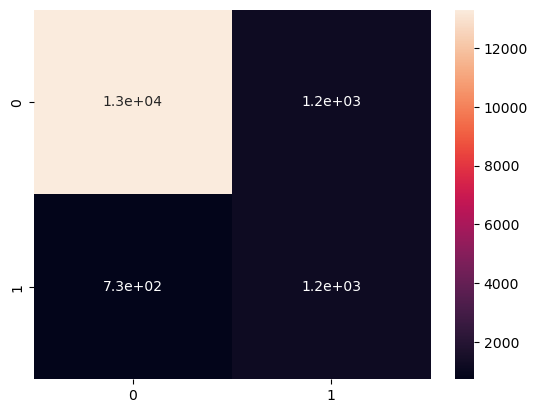

In [51]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(X_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

 LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [53]:
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(x_smote, y_smote)

C:\Users\emana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [54]:
y_pred = logreg_classifier.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     14516
           1       0.32      0.71      0.45      1898

    accuracy                           0.79     16414
   macro avg       0.64      0.76      0.66     16414
weighted avg       0.88      0.79      0.82     16414



 SVC

In [56]:
from sklearn.svm import SVC

In [57]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_smote, y_smote)

SVC(kernel='linear', random_state=42)

In [58]:
y_pred = svm_classifier.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     14516
           1       0.35      0.68      0.46      1898

    accuracy                           0.81     16414
   macro avg       0.65      0.76      0.67     16414
weighted avg       0.88      0.81      0.84     16414



In [60]:
y_pred = svm_classifier.predict(test)

In [61]:
submission['Target'] =y_pred# our model predictions on the test dataset


In [62]:
submission

,id,Target
0,74249,1
1,35779,1
2,66769,0
3,27888,0
4,63306,0
...,...,...
23444,902,0
23445,39745,0
23446,40150,1
23447,6012,1


In [63]:
submission['Target'].value_counts()

0    18236
1     5213
Name: Target, dtype: int64

In [64]:
submission.to_csv('v5eman_submissio.csv', index=False)